In [2]:
# Imported packages
import numpy as np
import math
from matplotlib import pyplot as plt
from astroquery import sha
from astropy import coordinates as coord
from astropy import units as u

from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image

/home/murphyj/anaconda3/lib/python3.6/site-packages/astroquery/sha/__init__.py:14: UserWarning: Experimental: SHA has not yet been refactored to have its API match the rest of astroquery.
  warnings.warn("Experimental: SHA has not yet been refactored to have its "


In [3]:
# Loads csv file
line = np.genfromtxt(open('/home/murphyj/Desktop/Coding/SNR_list.csv', "r"), names=True, delimiter=',', dtype=None)

/home/murphyj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [4]:
# Defines Columns as lists
MCSNR = []#0
RA = []#1
DE = []#2
Rad = []#8
kT = []#12
VShock = []#16
Age = []#18
LX = []#4
LIR = []#7

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][0]
    MCSNR.append(name)
MCSNR = np.asarray(MCSNR)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][1]
    RA.append(name)
RA = np.asarray(RA)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][2]
    DE.append(name)
DE = np.asarray(DE)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][8]
    Rad.append(name)
Rad = np.asarray(Rad)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][12]
    kT.append(name)
kT = np.asarray(kT)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][17]
    VShock.append(name)
VShock = np.asarray(VShock)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][20]
    Age.append(name)
Age = np.asarray(Age)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][4]
    LX.append(name)
LX = np.asarray(LX)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][7]
    LIR.append(name)
LIR = np.asarray(LIR)

In [5]:
# Decodes bytes to strings
x = [Ra.decode('UTF-8') for Ra in RA]
y = [Dec.decode('UTF-8') for Dec in DE]

# Creates Ra and Dec formats from data
im_ra = []
for n in range(num):
    things = x[n].split()
    Ra = things[0]+'h'+things[1]+'m'+things[2]+'s'
    im_ra.append(Ra)
#print(X[1])

im_dec = []
for n in range(num):
    things = y[n].split()
    Dec = things[0]+'d'+things[1]+'m'+things[2]+'s'
    im_dec.append(Dec)
#print(Y[1])

In [6]:
# Defines image sizes
im_size_as = Rad * 2
im_size_deg = im_size_as / 3600
im_size_am = im_size_as / 60

In [7]:
# Todo
# Astroquery
im_size = im_size_am*u.arcmin
im_pixels = 1024

In [29]:
import csv

res = [MCSNR: RA: DE]

csvfile = "list.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in res:
        writer.writerow([val])

SyntaxError: invalid syntax (<ipython-input-29-af7cf93734ff>, line 3)

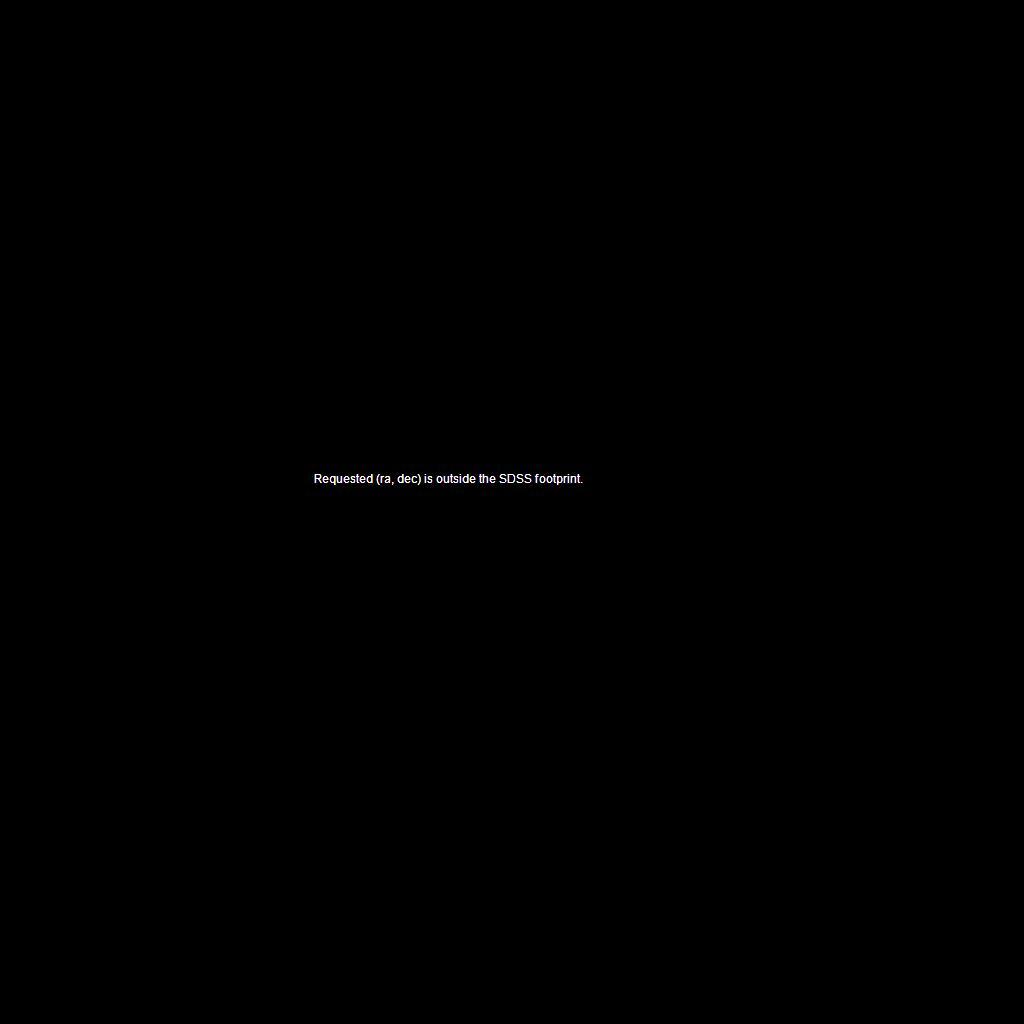

In [26]:
center = coord.SkyCoord(im_ra[1], im_dec[1], frame='icrs')
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=center.ra.deg,
                              dec=center.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=8))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'image_cutout.jpg')
Image('image_cutout.jpg')